In [1]:
# Thêm thư viện
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import string
import os
from PIL import Image
import glob
from pickle import dump, load
from time import time

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate


KeyboardInterrupt: ignored

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
cd drive/ImageCaption

/content/drive/ImageCaption


In [0]:
max_length= 34
vocab_size= 1652
embedding_dim=200

In [0]:
# Tạo model
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)

W0826 02:58:05.269211 140257013827456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 02:58:05.307344 140257013827456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 02:58:05.317649 140257013827456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0826 02:58:05.326357 140257013827456 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a futur

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 34)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 34, 200)      6800        input_5[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 2048)         0           input_4[0][0]                    
__________________________________________________________________________________________________
dropout_4 

In [0]:
from keras.models import load_model
model.load_weights('model_30.h5')

W0826 02:58:17.918171 140257013827456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



In [0]:
model_encode = InceptionV3(weights='imagenet')

W0822 07:30:11.537156 139749247596416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0822 07:30:11.740189 139749247596416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0822 07:30:12.503883 139749247596416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



96116736/96112376 [==============================] - 2s 0us/step


In [0]:
model_new = Model(model_encode.input,model_encode.layers[-2].output)

In [0]:
model_new=load_model('encode.h5')

W0826 03:01:06.406962 140257013827456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0826 03:01:06.601516 140257013827456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0826 03:01:06.941911 140257013827456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
# Load ảnh, resize về khích thước mà Inception v3 yêu cầu.
def preprocess(image_path):
    # Convert all the images to size 299x299 as expected by the inception v3 model
    img = image.load_img(image_path, target_size=(299, 299))
    # Convert PIL image to numpy array of 3-dimensions
    x = image.img_to_array(img)
    # Add one more dimension
    x = np.expand_dims(x, axis=0)
    # preprocess the images using preprocess_input() from inception module
    x = preprocess_input(x)
    return x

In [0]:
def encode(image):
  im= preprocess(image)
  fea_vec= model_new.predict(im)
  fea_vec= np.reshape(fea_vec,fea_vec.shape[1])
  return fea_vec

In [0]:
im= encode('towdog.jpeg')

In [0]:
print(im.shape)

(2048,)


In [0]:
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# filename = "Flickr8k/Flickr8k_text/Flickr8k.token.txt"

# doc = load_doc(filename)
# print(doc[:300])

In [0]:
# Lấy id ảnh tương ứng với dữ liệu train, test, dev
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load training dataset (6K)
filename = 'Flickr8k/Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))

Dataset: 6000


In [0]:
# Thêm 'startseq', 'endseq' cho chuỗi
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))

Descriptions: train=6000


In [0]:
all_train_captions = []
for key, val in train_descriptions.items():
    for cap in val:
        all_train_captions.append(cap)
len(all_train_captions)

30000

In [0]:
# Chỉ lấy các từ xuất hiện trên 10 lần
word_count_threshold = 10
word_counts = {}
nsents = 0
for sent in all_train_captions:
    nsents += 1
    for w in sent.split(' '):
        word_counts[w] = word_counts.get(w, 0) + 1

vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
print('preprocessed words %d -> %d' % (len(word_counts), len(vocab)))
file = open("vocab.txt", 'w')
lines = list()
for word in vocab:
  lines.append(word)
data = '\n'.join(lines)
file.write(data)
file.close()


preprocessed words 7578 -> 1651


In [0]:
vocabs = list()
file = open("vocab.txt", 'r')
text = file.read()
file.close()
for word in text.split('\n'):
  vocabs.append(word)
ixtoword = {}
wordtoix = {}

ix = 1
for w in vocabs:
    wordtoix[w] = ix
    ixtoword[ix] = w
    ix += 1

In [0]:
print(ixtoword)

{1: 'startseq', 2: 'child', 3: 'in', 4: 'pink', 5: 'dress', 6: 'is', 7: 'climbing', 8: 'up', 9: 'set', 10: 'of', 11: 'stairs', 12: 'an', 13: 'way', 14: 'endseq', 15: 'girl', 16: 'going', 17: 'into', 18: 'wooden', 19: 'building', 20: 'little', 21: 'the', 22: 'to', 23: 'her', 24: 'black', 25: 'dog', 26: 'and', 27: 'spotted', 28: 'are', 29: 'fighting', 30: 'tricolored', 31: 'playing', 32: 'with', 33: 'each', 34: 'other', 35: 'on', 36: 'road', 37: 'white', 38: 'brown', 39: 'spots', 40: 'staring', 41: 'at', 42: 'street', 43: 'two', 44: 'dogs', 45: 'different', 46: 'looking', 47: 'pavement', 48: 'moving', 49: 'toward', 50: 'covered', 51: 'paint', 52: 'sits', 53: 'front', 54: 'painted', 55: 'rainbow', 56: 'hands', 57: 'bowl', 58: 'sitting', 59: 'large', 60: 'small', 61: 'grass', 62: 'plays', 63: 'it', 64: 'there', 65: 'pigtails', 66: 'painting', 67: 'young', 68: 'outside', 69: 'man', 70: 'lays', 71: 'bench', 72: 'while', 73: 'his', 74: 'by', 75: 'him', 76: 'which', 77: 'also', 78: 'tied', 79:

In [0]:
vocab_size = len(ixtoword) + 1 # Thêm 1 cho từ dùng để padding
vocab_size

1652

In [0]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [0]:
import cv2

In [0]:
from google.colab.patches import cv2_imshow

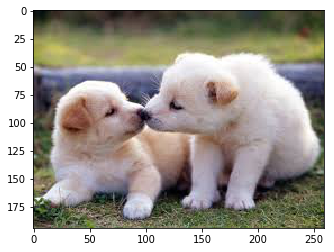

(1, 2048)
white dog is running through the grass


In [0]:
image = im.reshape((1,2048))
x=plt.imread('towdog.jpeg')
plt.imshow(x)
plt.show()
# image= np.reshape((1,2048))
print(image.shape)
print(greedySearch(image))